<a href="https://colab.research.google.com/github/Gladys27/Data-clasification/blob/main/wine_data_analysis_Gladys_Hdz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
import os


### Loading the Dataset

In [4]:
wine=pd.read_csv('/content/winemag-data_first150k.csv')

#### First 10 values

In [5]:
wine.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


#### Shape of the dataset

In [6]:
wine.shape

(150930, 11)

#### Print the name of columns

In [7]:
wine.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

#### Check for NULL Values

In [8]:
wine.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

#### Check unique values

In [9]:
wine.nunique()

Unnamed: 0     150930
country            48
description     97821
designation     30621
points             21
price             357
province          455
region_1         1236
region_2           18
variety           632
winery          14810
dtype: int64

#### Check for Duplicate values

In [10]:
wine.duplicated().sum()

0

No duplicate values present.

#### Make a copy of the dataset

In [11]:
df = wine.copy()

In [12]:
df.shape

(150930, 11)

#### Drop NULL values

In [13]:
df=df.dropna()
df.shape

(39241, 11)

#### Print first 10 values

In [14]:
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
11,11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
12,12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars
14,14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene
15,15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström
16,16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall


# Data Visualization

### points of the wine

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Points')

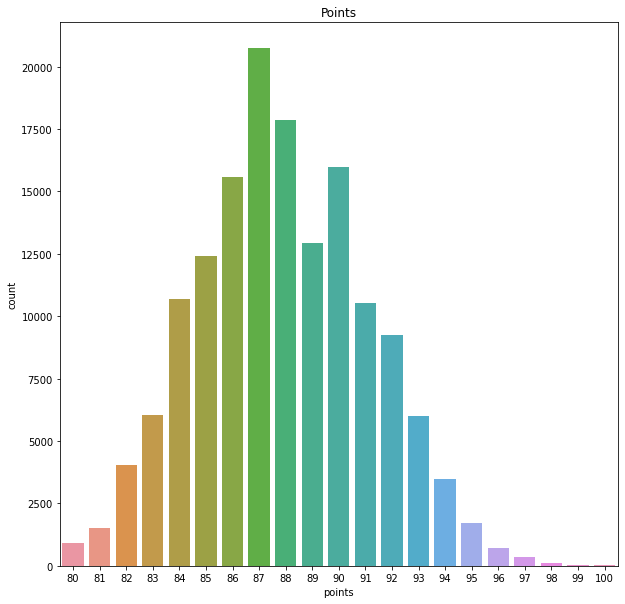

In [19]:
sns.countplot(wine['points'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Points')

### Rating of shows and movies

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Country')

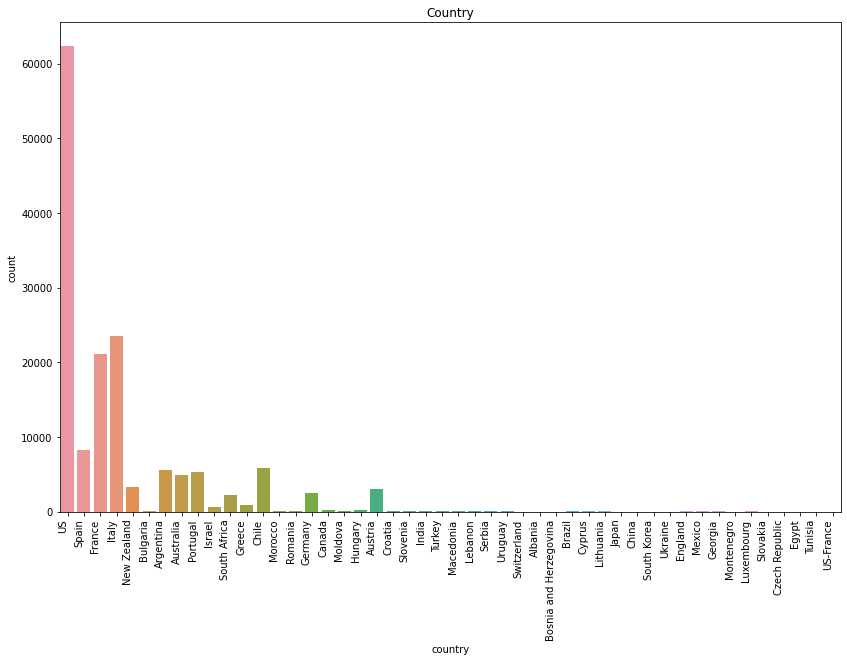

In [53]:
sns.countplot(wine['country'])
sns.countplot(wine['country']).set_xticklabels(sns.countplot(wine['country']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(14,9)
plt.title('Country')

### Relation between Country and Points

In [34]:
# get top 10 most frequent names
n = 10
top10=wine['country'].value_counts()[:n].index.tolist()

In [36]:
top10

['US',
 'Italy',
 'France',
 'Spain',
 'Chile',
 'Argentina',
 'Portugal',
 'Australia',
 'New Zealand',
 'Austria']

In [42]:
# selecting rows based on condition 
wine_df = wine[wine['country'].isin(top10)] 
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


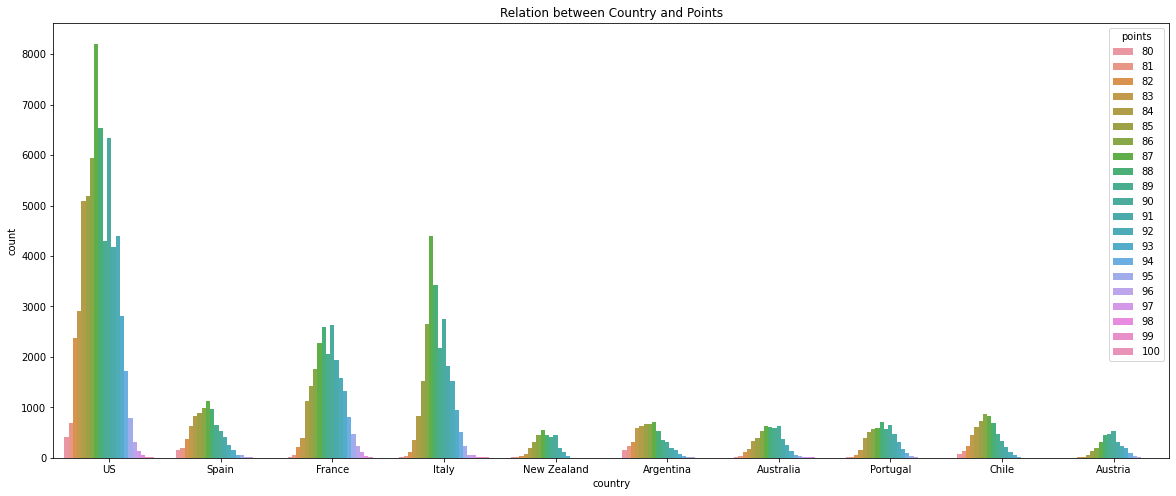

In [43]:
plt.figure(figsize=(20,8))
sns.countplot(x='country',hue='points',data=wine_df)
plt.title('Relation between Country and Points')
plt.show()

### Pie-chart for the Type: Movie and TV Shows

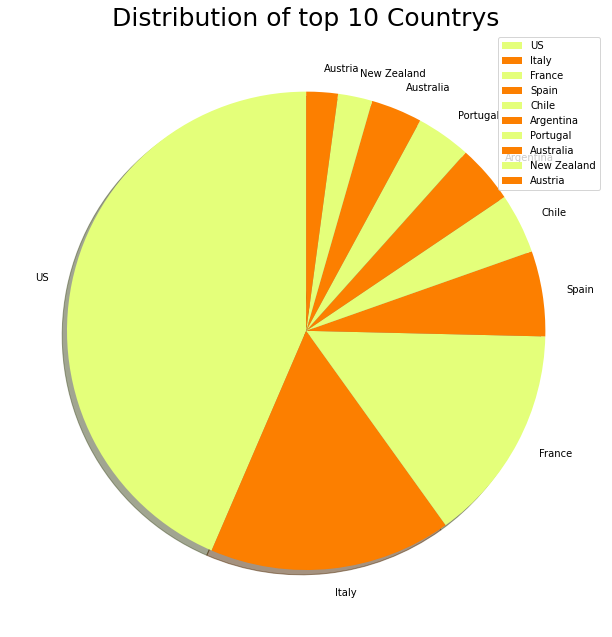

In [49]:
labels = top10
size = wine_df['country'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))

plt.pie(size,labels=labels, colors = colors, shadow = True, startangle = 90)
plt.title('Distribution of top 10 Countrys', fontsize = 25)
plt.rcParams['figure.figsize'] = (9, 9)
plt.legend()
plt.show()

# WordCloud

In [54]:
from wordcloud import WordCloud

## Country

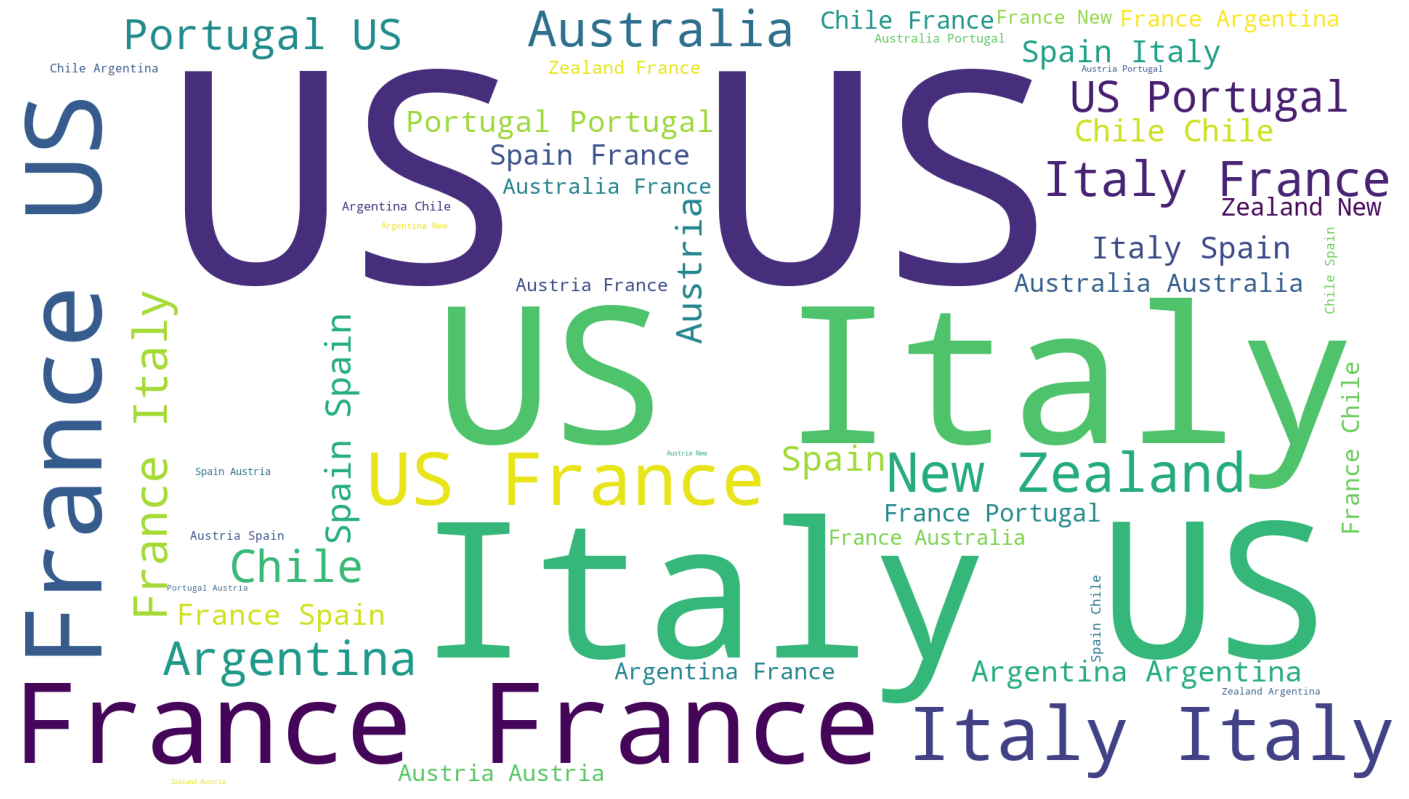

In [59]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(wine_df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

## Variety in wines

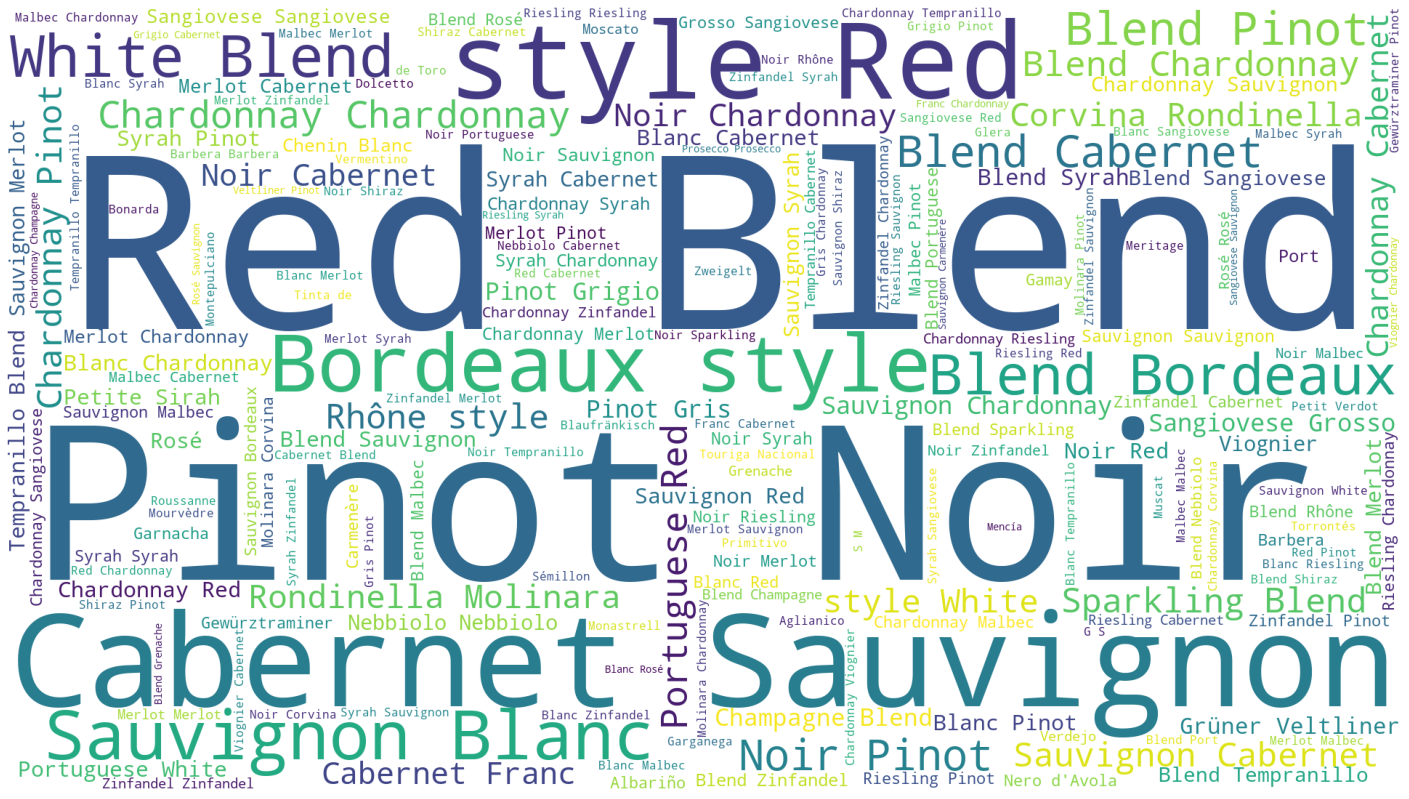

In [60]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(wine_df.variety))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('variety.png')
plt.show()

Conclusiones:

Revisando la base de datos, de las primeras cosas que me llamaron la atencion fue que la gran mayoria de la informacion se concentra en unos pocos paises, y que en cuanto a la calificaciones de los vinos sigue una distribución normal.

Basandome en eso mis sugerencias de que podriamos hacer con esta base se limitan a soluciones que probablemente solo apliquen a los paises con los que contamos con más información, dado que el origen del vino es importante y creo que es importante contar con una cantidad suficiente de información considerando que en las otras columnas tenemos variables como la region de origen, por lo que nuestra base de datos se torna todavia más especifica.

Creo que esta base podria ser interesante para hacer un sistema de recomendaciones de vino basandose en donde estas visitando, y en que otros vinos prefiere la persona, por ejemplo si a la persona le gusta un vino y existen otros vinos de la misma region, vineria, y variedad, en un rango similar de calidad entonces creo que seria apropiado recomendar otros vinos similares, y creo que se puede hacer eso con esta base.